## Exploratory data analysis


In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# import raw data
data = pd.read_csv("Rel_treat.csv", index_col=False)

data.head(10)

,id,NREM,REM,WAKE,Genotype,Treatment
0,1_1_cip10,53.423744,0.266785,46.309471,ko,sal
1,1_3_cip10,60.544677,9.025433,30.429890,ko,sal
2,1_4_cip10,20.456600,0.452080,79.091320,ko,cip10
3,1_5_cip10,26.550079,0.794913,72.655008,wt,cip10
4,1_7_cip10,42.585377,0.664680,56.749943,wt,sal
5,1_8_cip10,22.544022,1.969416,75.486562,ko,cip10
6,2_1_cip10,22.010921,1.186217,76.802862,wt,cip10
7,2_2_cip10,55.463138,5.519849,39.017013,wt,sal
8,2_3_cip10,47.309762,2.382782,50.307456,wt,sal
9,2_4_cip10,21.668910,0.230725,78.100365,wt,cip10


In [21]:
# create dummy variable for factor Genotype
# convert strings in Treatment to floats

genotype = {
    'wt': 0,
    'ko': 1
}

treatment = {
    'sal': 0.0,
    'cip3': 3.0,
    'cip10': 10.0
}

data['Genotype'] = data['Genotype'].apply(lambda x: genotype[x])
data['Treatment'] = data['Treatment'].apply(lambda x: treatment[x])
data.head()

,id,NREM,REM,WAKE,Genotype,Treatment
0,1_1_cip10,53.423744,0.266785,46.309471,1,0.0
1,1_3_cip10,60.544677,9.025433,30.429890,1,0.0
2,1_4_cip10,20.456600,0.452080,79.091320,1,10.0
3,1_5_cip10,26.550079,0.794913,72.655008,0,10.0
4,1_7_cip10,42.585377,0.664680,56.749943,0,0.0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         33 non-null     object 
 1   NREM       33 non-null     float64
 2   REM        33 non-null     float64
 3   WAKE       33 non-null     float64
 4   Genotype   33 non-null     int64  
 5   Treatment  33 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.7+ KB


In [23]:
def get_id(string):
    new_str = string[:3].replace("_", "")
    return new_str

data["id"] = data["id"].apply(get_id)
len(set(data['id'])), data.shape

(18, (33, 6))

In [24]:
subj = list(set(data['id']))
ids = list(range(1,len(subj)+1))

ids_dict = dict(zip(subj,ids))
data['id'] = data['id'].apply(lambda x: ids_dict[x])

In [36]:
data.head(5)

,id,NREM,REM,WAKE,Genotype,Treatment
0,16,53.423744,0.266785,46.309471,1,0.0
1,15,60.544677,9.025433,30.429890,1,0.0
2,17,20.456600,0.452080,79.091320,1,10.0
3,9,26.550079,0.794913,72.655008,0,10.0
4,12,42.585377,0.664680,56.749943,0,0.0


In [26]:
data.to_csv("data.csv", index=False)

### Correlations between features

In [27]:
data.iloc[:,1:].corr()

,NREM,REM,WAKE,Genotype,Treatment
NREM,1.000000,0.598378,-0.986324,0.019006,-0.847292
REM,0.598378,1.000000,-0.722250,0.039766,-0.564792
WAKE,-0.986324,-0.722250,1.000000,-0.024587,0.847593
Genotype,0.019006,0.039766,-0.024587,1.000000,0.006072
Treatment,-0.847292,-0.564792,0.847593,0.006072,1.000000


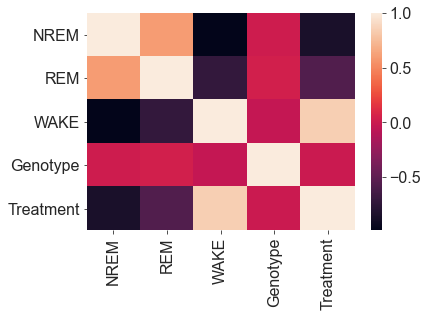

In [28]:
sns.heatmap(data.iloc[:,1:].corr())
plt.show()

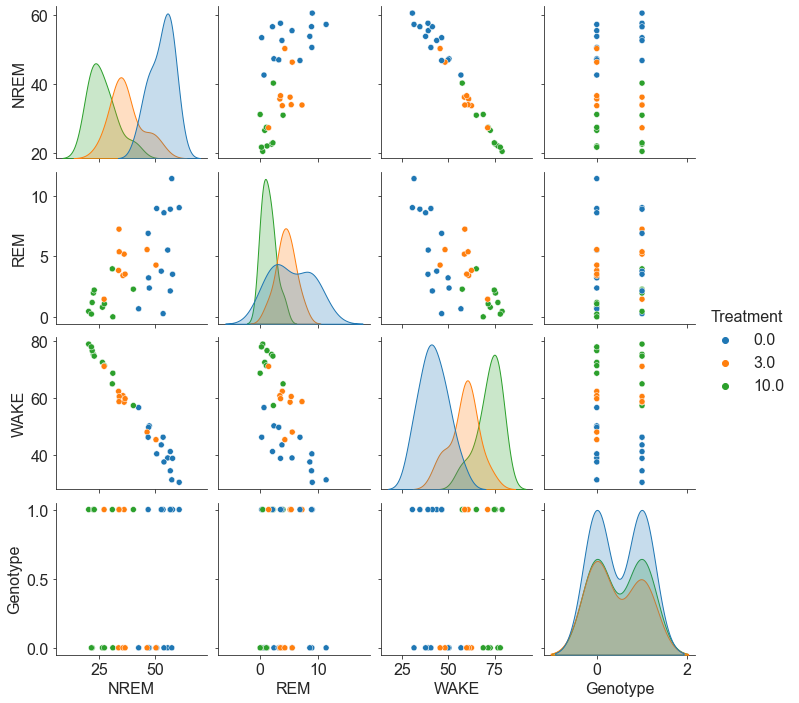

In [29]:
sns.pairplot(data.iloc[:,1:], hue="Treatment", palette="tab10")
plt.show()

### Outliers

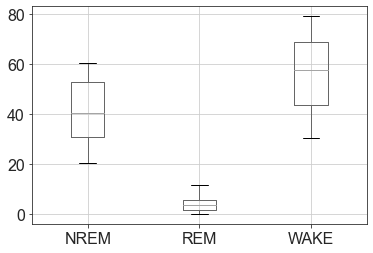

In [30]:
df_box = data[["NREM", "REM", "WAKE"]].copy()
df_box.boxplot()
plt.suptitle('')
plt.show()

In [31]:
data.groupby(['Treatment', 'Genotype']).describe(percentiles=[])

id                                         NREM  \
                   count       mean       std   min   50%   max count   
Treatment Genotype                                                      
0.0       0          7.0   7.428571  4.720775   1.0   8.0  14.0   7.0   
          1          7.0  12.285714  5.618846   4.0  15.0  18.0   7.0   
3.0       0          5.0   7.200000  5.449771   2.0   5.0  14.0   5.0   
          1          4.0  12.500000  2.645751  10.0  12.0  16.0   4.0   
10.0      0          5.0   5.400000  3.646917   1.0   7.0   9.0   5.0   
          1          5.0  13.000000  4.847680   6.0  13.0  18.0   5.0   

                                                    ...       REM            \
                         mean       std        min  ...       std       min   
Treatment Genotype                                  ...                       
0.0       0         50.570979  5.265957  42.585377  ...  3.963150  0.664680   
          1         54.885475  4.434289  46.803123  ...  3.397423  0.266785   
3.0       0         40.504747  7.320155  33.702835  ...  0.868256  3.415478   
          1         32.836775  3.843519  27.291667  ...  2.425190  1.458333   
10.0      0         25.761824  3.979189  21.668910  ...  0.521308  0.000000   
          1         27.423281  8.206860  20.456600  ...  1.249106  0.452080   

                                         WAKE                                  \
                         50%        max count       mean       std        min   
Treatment Genotype                                                              
0.0       0         5.519849  11.426699   7.0  43.604168  8.889489  31.308718   
          1         3.776224   9.025433   7.0  40.182221  6.015345  30.429890   
3.0       0         3.837135   5.557801   5.0  55.371505  7.944593  45.456560   
          1         5.281750   7.248764   4.0  62.345575  6.003120  58.642496   
10.0      0         0.794913   1.186217   5.0  73.580836  3.822621  68.839201   
          1         2.212806   3.968411   5.0  70.398690  8.899632  57.463031   

                                          
                          50%        max  
Treatment Genotype                        
0.0       0         40.461804  56.749943  
          1         41.264119  46.309471  
3.0       0         59.882305  62.460030  
          1         59.744903  71.250000  
10.0      0         72.655008  78.100365  
          1         74.858757  79.091320  

[6 rows x 24 columns]

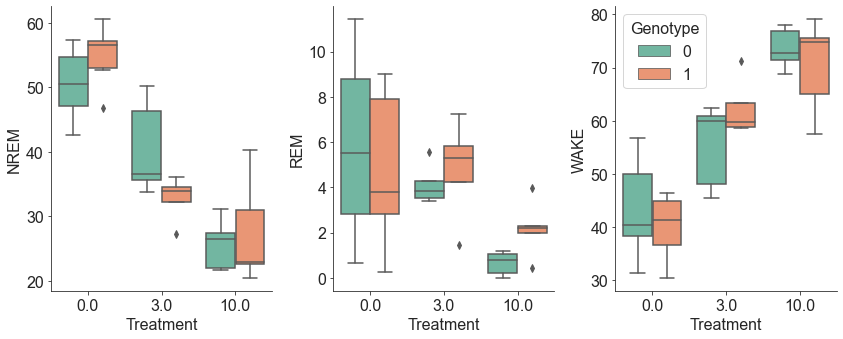

In [32]:
fig = plt.figure(figsize=(12,5))
sns.set_context(rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 
sns.set_style("ticks")
sns.set_palette("Set2")

ax1 = fig.add_subplot(131)
sns.boxplot(x = 'Treatment',
            y = 'NREM',
            hue = 'Genotype',
            data = data,
            ax=ax1
              )

ax2 = fig.add_subplot(132)
sns.boxplot(x = 'Treatment',
            y = 'REM',
            hue = 'Genotype',
            data = data,
            ax=ax2
             )

ax3 = fig.add_subplot(133)
sns.boxplot(x = 'Treatment',
            y = 'WAKE',
            hue = 'Genotype',
            data = data,
            ax=ax3
             )

sns.despine(top = True, right = True)
ax1.get_legend().remove()
ax2.get_legend().remove()
fig.tight_layout()

plt.show()

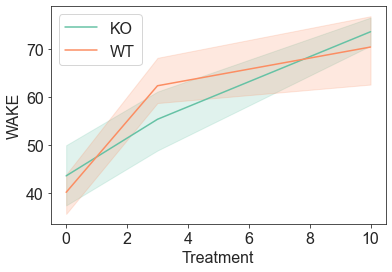

In [33]:
sns.lineplot(x="Treatment",y="WAKE",hue="Genotype", data=data, legend=False, palette="Set2")
plt.legend(["KO", "WT"])
plt.show()

<AxesSubplot:xlabel='Treatment', ylabel='WAKE'>

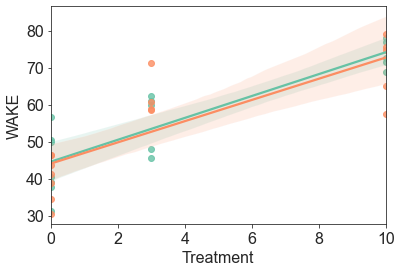

In [37]:
wt = data.index[data["Genotype"]==0]
ko = data.index[data["Genotype"]==1]

sns.regplot(x=data.iloc[wt]["Treatment"],y=data.iloc[wt]["WAKE"],data=data)
sns.regplot(x=data.iloc[ko]["Treatment"],y=data.iloc[ko]["WAKE"],data=data)